# **Aula 1 - Conhecendo a biblioteca Matplotlib**


##**Conhecendo os dados**

### Importando os dados

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('imigrantes_canada.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

### Realizando alguns tratamentos

In [3]:
df.set_index('País', inplace=True)
anos = list(map(str, range(1980, 2014)))
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Extraindo a série de dados para o Brasil

In [4]:
brasil = df.loc['Brasil', anos]
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}

dados_brasil = pd.DataFrame(brasil_dict)
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


In [5]:
import matplotlib.pyplot as plt

## Evolução de imigrantes brasileiros para o Canadá

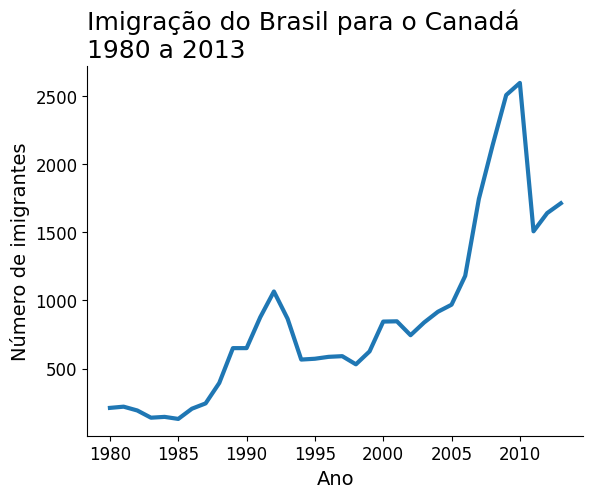

In [7]:
fig, ax = plt.subplots()
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

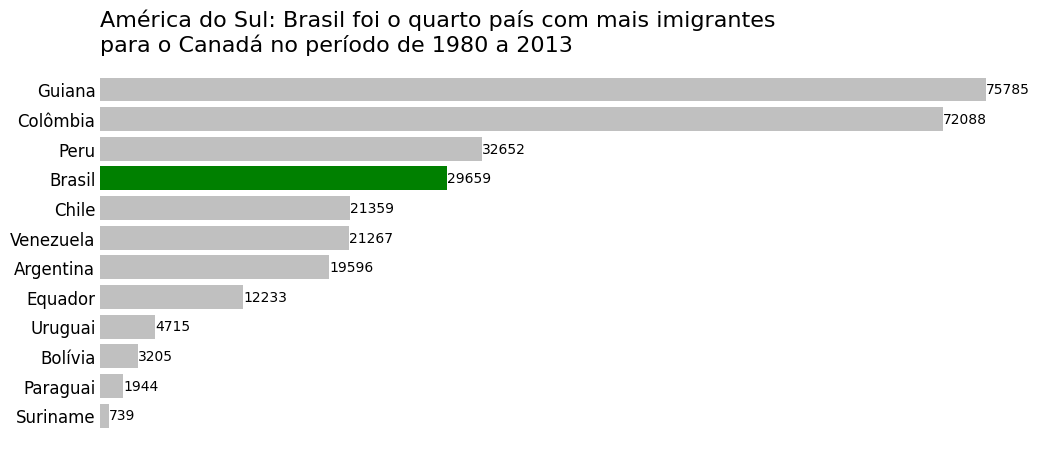

In [23]:
# Cria um dataframe com os países da América do Sul
america_sul = df.query('Região == "América do Sul"').sort_values(by='Total', ascending=True)

# Criando uma lista de cores para destacar o Brasil
cores = []
for pais in america_sul.index:
    if pais == 'Brasil':
        cores.append('green')
    else:
        cores.append('silver')

# Criando a figura
fig, ax = plt.subplots(figsize=(12, 5))
ax.barh(america_sul.index, america_sul['Total'], color=cores)
ax.set_title('América do Sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

# Loop para adicionar o valor máximo de cada barra
for i, v in enumerate(america_sul['Total']):
    ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

# Retirando o Frame (retângulo que encobre os gráficos)
ax.set_frame_on(False)

# Retirando o eixo X
ax.get_xaxis().set_visible(False) 

# Removendo todos os ticks dos eixos X e Y
ax.tick_params(axis='both', which='both', length=0)

# Salvando a figura
fig.savefig('imagens/imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()